# Exam \#2: Due end of class, November 19

**Important:** You need these files to complete this exam: 
1. exports_by_state_commodity_2002_2017.csv
2. imports_by_state_commodity_2008_2017.csv 
3. state_codes.csv
4. Madison_nonstop_routes.csv
5. US_airport_locations.csv
6. cb_2017_us_state_500k.zip


Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, print the notebook and hand it in during class. Be mindful of what you choose to print. A 'head()' statement that only prints a few rows is better than printing an entire DataFrame. 

\[To print: From the file menu, choose 'print preview' which will open a new tab with the notebook ready to print. Please print on both sides of paper if possible.\]

A reminder: Ruhl's office hours are T/R 2:30PM-3:30PM in Soc Sci 7444 and McWeeny's office hours are Monday 9:30AM-11:30AM in Soc Sci 6470. Email is always welcome. 

* You may use your notes, books, and the internet
* Do not consult with other people. This work should be entirely your own. 

# Exercise 0: Domash, Brandon
Replace 'Your name' above with your actual name. Enter it as last name, first name. Don't forget the comma!

# Exercise 1: Exports and imports by state

The last year has seen an increase in uncertainty about access to foreign markets. NAFTA is renegotiated, the state of trade with China is in flux, and the U.S.-E.U. trade relationship is strained. How would decreased access to foreign markets affect local economies? States that are net exporters would lose revenues and states that are net importers would lose a source of consumer goods and inputs into local industry. How exposed are states to foreign trade?

In this question we determine the state-level pattern of trade in agricultural goods. Agricultural trade is big business, so we are starting here, but the analysis could be extended to other industries. What states are agricultural net importers? Net exporters? 

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

### Part (a): Create the dataset

The files exports_by_state_commodity_2002_2017.csv and imports_by_state_commodity_2008_2017.csv contain data on state-level imports and exports by commodity type. An observation is total export value (or import value) for a state in a given commodity for a given year. 

The file state_codes.csv contains the two-letter state postal codes. 

1. Load the import and export data. Clean up the data as needed. 
2. Merge the export and import data to create a single DataFrame.
3. Merge the state postal codes into the DataFrame.
3. Create a variable named 'net_exports' that is equal to export value minus import value for each state-commodity-year.
4. Create two new columns: one holds log (base 10) exports and the other log (base 10) imports.  
4. Display the first 5 lines of your DataFrame.


In [152]:
exports = pd.read_csv('exports_by_state_commodity_2002_2017.csv',header=2)
imports = pd.read_csv('imports_by_state_commodity_2008_2017.csv',header=2)
state = pd.read_csv('state_codes.csv')
state['state'] = state['state'].replace('District of Columbia','Dist of Columbia')

data = pd.merge(left=exports,right=imports,on=['State','Commodity','Country','Time'],how='inner')
data = pd.merge(left=data,right=state,left_on='State',right_on='state',how='inner')

#some cleaning
data = data.drop('state',axis=1)
data = data.rename(columns={'Total Exports Value ($US)':'exports','Customs Value (Gen) ($US)':'imports'})
data['exports'] = pd.to_numeric(data['exports'].str.replace(',',''))
data['imports'] = pd.to_numeric(data['imports'].str.replace(',',''))

data['net_exports'] = data['exports'] - data['imports']
data['log_exports'] = np.log10(data['exports'])
data['log_imports'] = np.log10(data['imports'])


### Part (b): Create a plot

Create a scatter plot with the following features:
1. The y-axis is log exports. The range is \[5,11\]
2. The x axis is log imports. The range is \[5,11\]
3. Plot the 45-degree line as black and dashed.
4. A point on the scatter plot is the (log imports, log exports) of each state for the year 2017. The points that lie above the 45-degree line should be blue circles that not filled in. The points that lie below the 45-degree line should be red squares that are not filled in. 
5. Add the appropriate labels, etc. Make your figure look nice. 


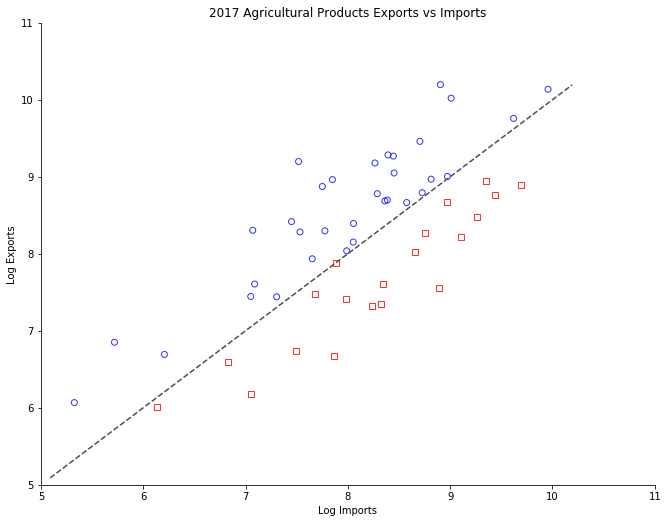

In [153]:
fig, ax = plt.subplots(figsize = (11,8.5))

data2 = data[(data['Time']==2017) & (data['Commodity']=='111 Agricultural Products')]
ax.set_title('2017 Agricultural Products Exports vs Imports')



above = data2[data2['log_exports']>=data2['log_imports']]
below = data2[data2['log_exports']< data2['log_imports']]

sns.regplot(y='log_exports',x='log_imports',data=above,ci=0,fit_reg=False,ax=ax,
            scatter_kws={'facecolors':'none', 'edgecolors':'blue'})
sns.regplot(y='log_exports',x='log_imports',data=below,ci=0,fit_reg=False,ax=ax,marker='s',
            scatter_kws={'facecolors':'none', 'edgecolors':'red'})

ax.plot(ax.get_xlim(), ax.get_xlim(),c='.3',ls='--')

sns.despine()
ax.set_ylabel('Log Exports')
ax.set_xlabel('Log Imports')
ax.set_xbound(5,11)
ax.set_ybound(5,11)

plt.show()

### Part (c): Labels

In your plot for part b, print the two-letter postal abbreviation of the state next to its data point for the following states. 

```python
states_to_label = ['OH', 'WI', 'CA', 'TX', 'NY', 'VI', 'DC', 'OK', 'LA', 'RI']
```
Do it 'programmatically'. By that I mean, do not write 10 separate statements to label 10 points. A loop might be a nice way to go. \[Or maybe there is a package floating around out there that will do it?\]

Offset the a bit in the y-dimension so that the label is not right on the data marker. 

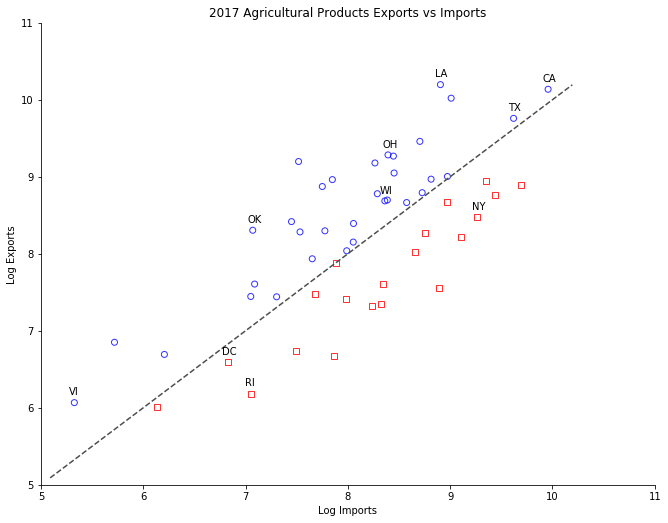

In [155]:
fig, ax = plt.subplots(figsize = (11,8.5))

data2 = data[(data['Time']==2017) & (data['Commodity']=='111 Agricultural Products')]
ax.set_title('2017 Agricultural Products Exports vs Imports')



above = data2[data2['log_exports']>=data2['log_imports']]
below = data2[data2['log_exports']< data2['log_imports']]

sns.regplot(y='log_exports',x='log_imports',data=above,ci=0,fit_reg=False,ax=ax,
            scatter_kws={'facecolors':'none', 'edgecolors':'blue'})
sns.regplot(y='log_exports',x='log_imports',data=below,ci=0,fit_reg=False,ax=ax,marker='s',
            scatter_kws={'facecolors':'none', 'edgecolors':'red'})

ax.plot(ax.get_xlim(), ax.get_xlim(),c='.3',ls='--')

states_to_label = ['OH', 'WI', 'CA', 'TX', 'NY', 'VI', 'DC', 'OK', 'LA', 'RI']

for x,y,label in zip(data2['log_imports'],data2['log_exports'],data2['postal']):
    if label in states_to_label:
        ax.text(x-.05, y+.1, label) 
        #It was at this point I realized DC was missing from my dataset! One of the drawback of inner merges
    
    
sns.despine()
ax.set_ylabel('Log Exports')
ax.set_xlabel('Log Imports')
ax.set_xbound(5,11)
ax.set_ybound(5,11)

plt.show()

# Exercise 2: Plotting airline routes

The goal of this exercise is to create a map of all the nonstop airline routes departing from Madison, Wisconsin in the second quarter of 2018.

The file Madison_nonstop_routes.csv contains information on the airline, destination airport, and number of passengers transported on each airline route departing from Madison. The file US_airport_locations.csv contains the latitude and longitude of every airport in the United States. Finally, the folder cb_2017_us_state_500k.zip contains the shapefiles for all U.S. states (you will need to unzip it for this exercise).

To create the map, carefully follow the instructions below.

### Part (a): Merging routes with coordinates of destination airports 
1. Load Madison_nonstop_routes.csv into a Pandas DataFrame. Then, create a new column that contains a string with the name of the desired color for each airline. Make the routes for American Airlines blue, those for Delta Air Lines red, those for United Airlines yellow, and those for Frontier Airlines green.
2. Load US_airport_locations.csv as a Pandas DataFrame. Then merge this DataFrame with the DataFrame created in (1) using `airport_id` as the key. Name the resulting Dataframe `merged`. Make sure you only keep the observations corresponding to the nonstop destinations from Madison.
3. In the merged data frame, rename the column `'longitude'` to `'dest_lon'` and the column `'latitude'` to `'dest_lat'`.


In [308]:
col = {'Delta Air Lines':'red','American Airlines':'blue','United Airlines':'yellow','Frontier Airlines':'green'}
routes = pd.read_csv('Madison_nonstop_routes.csv')
locs = pd.read_csv('US_airport_locations.csv')

routes['color'] = routes['airline']
routes['color'] = routes['color'].replace(col)

merged = pd.merge(left=routes,right=locs.loc[:,('airport_id','latitude','longitude')],on='airport_id',how='left')
merged = merged.rename(columns={'latitude':'dest_lat','longitude':'dest_lon'})

merged.head()

,origin,airport_id,carrier,passengers,airline,color,dest_lat,dest_lon
0,MSN,ATL,DL,6620.0,Delta Air Lines,red,33.636667,-84.427778
1,MSN,CLT,AA,2880.0,American Airlines,blue,35.213611,-80.949167
2,MSN,DCA,DL,3810.0,Delta Air Lines,red,38.851389,-77.037778
3,MSN,DEN,F9,5490.0,Frontier Airlines,green,39.861667,-104.673056
4,MSN,DEN,UA,5540.0,United Airlines,yellow,39.861667,-104.673056


4. As we did in class, create a column called `'dest_coord'` containing a list of each observation's longitude and latitude corrdinates. \[Hint: We used zip().\]
5. Convert `'dest_coord'` to  Point objects. 
6. The longitude of Madison's airport is -89.3375 degrees, and its latitude is 43.14 degrees. In the data frame `merged`, create columns named `'origin_lon'` and `'origin_lat'` to contain these points.
7. Later on, it will be useful to have two columns in the merged dataframe: one containing the longitude points of both the origin and destination and one containing the latitude points of the origin and destination. Name the columns `'longitude_pair'` and `'latitude_pair'`. The code for creating the longitude column should look something like
```python
merged['longitude_pair'] = list(zip(merged['origin_lon'], merged['dest_lon']))
```

In [311]:
from shapely.geometry import Point

merged['dest_coord'] = list(zip(merged['dest_lon'],merged['dest_lat']))
merged['dest_coord'] = merged['dest_coord'].apply(Point)

merged['origin_lat'] = 43.14
merged['origin_lon'] = -89.3375

merged['latitude_pair'] = list(zip(merged['origin_lat'], merged['dest_lat']))
merged['longitude_pair'] = list(zip(merged['origin_lon'], merged['dest_lon']))

merged.head()

,origin,airport_id,carrier,passengers,airline,color,dest_lat,dest_lon,dest_coord,origin_lat,origin_lon,latitude_pair,longitude_pair
0,MSN,ATL,DL,6620.0,Delta Air Lines,red,33.636667,-84.427778,POINT (-84.42777778 33.63666667),43.14,-89.3375,"(43.14, 33.63666667)","(-89.3375, -84.42777778)"
1,MSN,CLT,AA,2880.0,American Airlines,blue,35.213611,-80.949167,POINT (-80.94916667 35.21361111),43.14,-89.3375,"(43.14, 35.21361111)","(-89.3375, -80.94916667)"
2,MSN,DCA,DL,3810.0,Delta Air Lines,red,38.851389,-77.037778,POINT (-77.03777778 38.85138889),43.14,-89.3375,"(43.14, 38.85138889)","(-89.3375, -77.03777778)"
3,MSN,DEN,F9,5490.0,Frontier Airlines,green,39.861667,-104.673056,POINT (-104.6730556 39.86166667),43.14,-89.3375,"(43.14, 39.86166667)","(-89.3375, -104.6730556)"
4,MSN,DEN,UA,5540.0,United Airlines,yellow,39.861667,-104.673056,POINT (-104.6730556 39.86166667),43.14,-89.3375,"(43.14, 39.86166667)","(-89.3375, -104.6730556)"


### Part (b): Importing the state shapefiles

1. Import the shapefile for states as a GeoDataFrame. Convert the column names to lower case.
2. Note that the file contains the outlines of serveral territories in addition to the 50 states. We do not need these, and nor do we need Alaska or Hawaii. Thus, in the state data, drop the observations for which `'stusps'` is equal to 'GU', 'MP', 'AS', 'PR', 'VI', 'AK', or 'HI'.

In [312]:
states = gpd.read_file('cb_2017_us_state_500k/cb_2017_us_state_500k.shp')
states.columns = [i.lower() for i in states.columns]

drop = ['GU','MP','AS','PR','VI','AK','HI']
states = states[~states['stusps'].isin(drop)]
states.head()

,statefp,statens,affgeoid,geoid,stusps,name,lsad,aland,awater,geometry
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ..."
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40...."
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0..."
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4..."
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43..."


### Part (c): Making the map

1. Plot the outlines of all the states. Make the edges of each state black but make the fill color of each state tan.
2. Convert `merged` to a GeoDataFrame called `gdf` with `'dest_coord'` as the geometry. Then, plot the location of each of these destination airports as a black dot on the map.
3. Use the `.annotate()` function to label each destination with the appropriate `'airport_id'`. This will require a for-loop.
4. Now we need to plot a line between Madison and each destination for each nonstop route for each airline. 
    1. Wite a for-loop to plot a line corresponding to each route in the `merged` data frame. Then, for each observation, pass the values in the columns `'longitude_pair'` and `'latitude_pair'` to the `.plot()` function.
    2. Make a legend describing the color of the line for each airline. **Make sure the legend shows each airline only once! HINT: This will require some clever if-else statements within the for-loop!** 
5. Finally, plot the location of Madison's airport as a black square and label this point 'MSN'. Remove the axis spines and add an appropriate title for the figure.

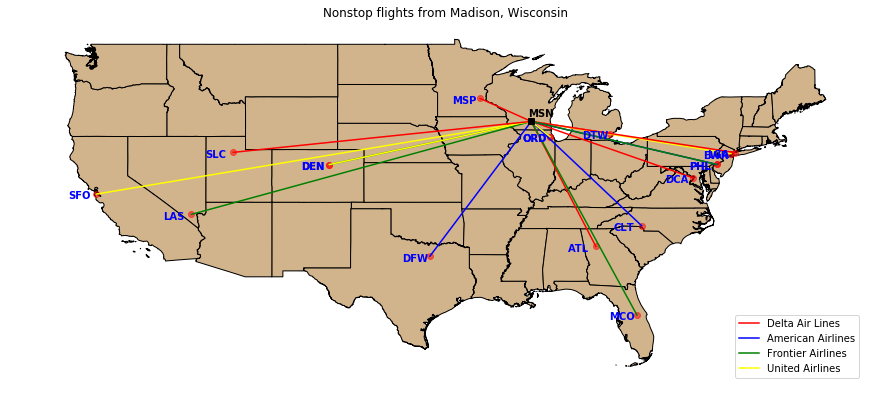

In [385]:
fig, ax = plt.subplots(figsize = (15,15))

gdf = gpd.GeoDataFrame(merged,geometry='dest_coord')
states.plot(ax=ax,edgecolor='black',color='tan')
gdf.plot(ax=ax, color='red',alpha=.5)

for y, x, label in zip(gdf['dest_lat'], gdf['dest_lon'], gdf['airport_id']):
    ax.annotate(label, xy=(x,y), xytext=(-28,-5), textcoords='offset points',color='blue', fontweight='bold')

used = []
for x_pair, y_pair, c,airline in zip(gdf['longitude_pair'],gdf['latitude_pair'],gdf['color'],gdf['airline']):
    if airline not in used:
        plt.plot(x_pair,y_pair,color=c,label=airline)
        used.append(airline)
    else:
        plt.plot(x_pair,y_pair,color=c)

ax.legend(loc=4)

plt.plot(gdf.iloc[0]['origin_lon'],gdf.iloc[0]['origin_lat'],color='black',marker='s')
ax.annotate('MSN', xy=(gdf.iloc[0]['origin_lon'],gdf.iloc[0]['origin_lat']), xytext=(-3,5), textcoords='offset points',color='black', fontweight='bold')

plt.axis('off')
ax.set_title('Nonstop flights from Madison, Wisconsin')
plt.show()

